Found 13450 images belonging to 2 classes.
Found 8926 images belonging to 2 classes.
(128, 128, 128, 3) (128,)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 42, 42, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               147712    
_________

KeyboardInterrupt: 

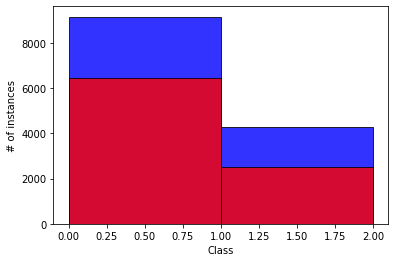

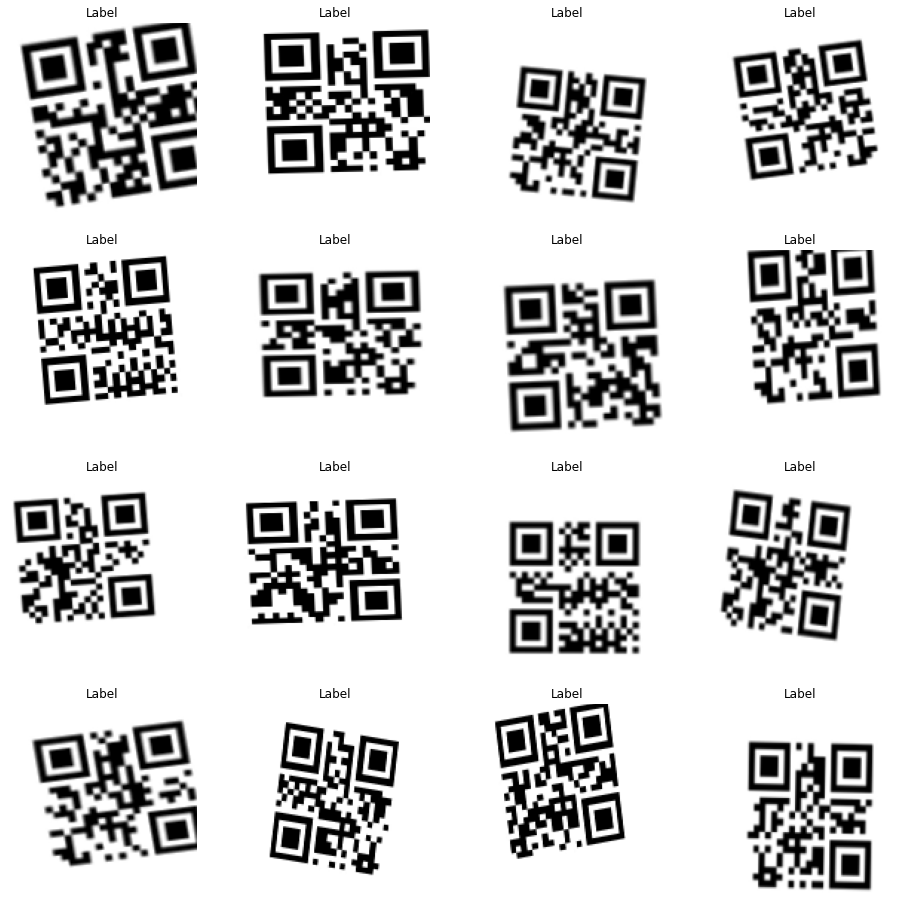

In [20]:
"""
Adding gaussian and blur type noise in qrcodes. It detects if any qr code have that kind of noise within it.
While photocopies are slightly more sophisticated because scanner dpi and ink effects image pixel. So adding random noise will work best for photocopies and scanned copies.
 + quality of paper is also major deciding factor.
 
 Pure QrCode : Real
 QRcode + noise : Fake
    
"""
#import lib
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense 
from keras.preprocessing import image 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
    
deprecation._PER_MODULE_WARNING_LIMIT=0

kernal_size=3
batch_size = 128

train_datagen = ImageDataGenerator(
   rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('dataset/training',
                                                target_size=(128,128),
                                                 batch_size=batch_size,
                                                 class_mode='binary'
)

test_set  = test_datagen.flow_from_directory('dataset/test',
                                            target_size=(125, 125),
                                            batch_size=batch_size,
                                             class_mode='binary'
                                            )

h1= plt.hist(training_set.classes, bins=range(0,3), alpha=0.8,color='blue',edgecolor='black')
h2 = plt.hist(test_set.classes, bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4, 4,i+1)
        plt.axis('off')
        plt.title('Label')
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break
    
model = Sequential()
model.add(Convolution2D(32, kernal_size, kernal_size,activation='relu', input_shape=(128, 128, 3) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, kernal_size, kernal_size, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(activation='relu', units=256))
model.add(Dense(activation='sigmoid', units=1))
model.summary()

#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callbacks_list= [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5',monitor='val_loss', save_best_only=True, mode='max')
]

hist = model.fit(
        training_set,
        epochs=10,
        validation_data = test_set,
        callbacks = callbacks_list
)
training_set.class_indices


In [21]:

def Detector(img):
    test_img = image.load_img(img, target_size=(128,128))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    result= model.predict(test_img)
    if result[0][0] == 1:
        predictions = 'Real'        
    else:
        predictions = 'Fake'
        
    print("Prediction : ",predictions)
    
img = 'dataset/qr_pred/11-fake.jpg'
b = Detector(img)
print(b)

Prediction :  Fake
None
